<a href="https://colab.research.google.com/github/hibaadreese/asr-arabic-transformer/blob/master/VGGISH_SVM_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os

In [43]:
!pip install librosa

In [44]:
all=["/content/drive/MyDrive/الاية1_اناثfalse",
     "/content/drive/MyDrive/الاية1اناثtrue"
     ,"/content/drive/MyDrive//الاية1ذكورfalse"
     ,"/content/drive/MyDrive/الاية1ذكورtrue"
     ,"/content/drive/MyDrive/اية2اناثfalse",
     "/content/drive/MyDrive/اية2اناثtrue",
     "/content/drive/MyDrive/اية2ذكورfalse"
     ,"/content/drive/MyDrive/اية2ذكورtrue"
     ,"/content/drive/MyDrive/اية3اناثfalse"
     ,"/content/drive/MyDrive/اية3اناثtrue",
     "/content/drive/MyDrive/اية3ذكور false"
     ,"/content/drive/MyDrive/اية3ذكور true"
     ,"/content/drive/MyDrive/الاية4اناثfalse"
     ,"/content/drive/MyDrive/الاية4اناثtrue"
     ,"/content/drive/MyDrive/الاية4ذكورfalse"
     ,"/content/drive/MyDrive/الاية4ذكورtrue"
     ,"/content/drive/MyDrive/الاية5اناث_false"
     ,"/content/drive/MyDrive/الاية5اناث_true"
     ,"/content/drive/MyDrive/الاية5ذكورfalse"
     ,"/content/drive/MyDrive/الاية5ذكورfalse"
     ,"/content/drive/MyDrive/_البحث1_انثىtrue"
     ,"/content/drive/MyDrive/االبحث1_ذكر_true"
     ,"/content/drive/MyDrive/البحث1_انثىfalse/البحث1_انثىfalse"
     ,"/content/drive/MyDrive/البحث1_ذكر_بfalse/البحث1_ذكر_بfalse"]

In [45]:
import os
import librosa

audio_data_with_labels = []
for audio_file_path in all:
  audio_folder_path=audio_file_path
  audio_files=[f for f in os.listdir(audio_folder_path)if os.path.isfile(os.path.join(audio_folder_path,f))]
  for filename in os.listdir(audio_folder_path):
    if filename.endswith(".wav"):  # Check if it's a WAV file
        file_path = os.path.join(audio_file_path, filename)

        # Load the audio file
        audio_data, sample_rate = librosa.load(file_path)

        # Now you have the audio data in 'audio_data' and the sample rate in 'sample_rate'
        # You can process the audio data as needed.
        resampled_audio = librosa.resample(audio_data, orig_sr=sample_rate, target_sr=16000)



                # Append audio data and label to the list
    audio_data_with_labels.append({
                    'resampled_audio': resampled_audio,
                    'target_sr': 16000,
                    'label': audio_file_path  # Use folder name as the label
                })


In [46]:
target_labels =["/content/drive/MyDrive/الاية1_اناثfalse",

     "/content/drive/MyDrive//الاية1ذكورfalse",
     "/content/drive/MyDrive/اية2اناثfalse",

     "/content/drive/MyDrive/اية2ذكورfalse"

     ,"/content/drive/MyDrive/اية3اناثfalse",

     "/content/drive/MyDrive/اية3ذكور false"

     ,"/content/drive/MyDrive/الاية4اناثfalse"

     ,"/content/drive/MyDrive/الاية4ذكورfalse"

     ,"/content/drive/MyDrive/الاية5اناث_false"

     ,"/content/drive/MyDrive/الاية5ذكورfalse"

     ,"/content/drive/MyDrive/البحث1_انثىfalse/البحث1_انثىfalse"
     ,"/content/drive/MyDrive/البحث1_ذكر_بfalse/البحث1_ذكر_بfalse"]

In [47]:
all_item=[]

for item in audio_data_with_labels:
       if item['label'] in target_labels:
           item['label'] = 0
           all_item.append(item)
       else:
           item['label'] = 1
           all_item.append(item)

In [48]:
len(audio_data_with_labels)

3643

In [49]:
all_frames=[]

In [50]:
frame_length = 2048  # Adjust this as needed
hop_length = 512    # Adjust this as needed
for item in all_item:
  resampled_audio=item['resampled_audio']
  frames = librosa.util.frame(resampled_audio, frame_length=frame_length, hop_length=hop_length)
  frames = frames.T
  all_frames.append(frames)


NEWW

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extract resampled audio and labels into separate lists
resampled_audio_data = [d['resampled_audio'] for d in all_item]
labels = [d['label'] for d in all_item]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(resampled_audio_data, labels, test_size=0.20, random_state=42)

# Scale data
# ... (rest of your code)

In [52]:
!pip install librosa tensorflow==2.12.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12.0


In [74]:
import tensorflow as tf # Import tensorflow
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import librosa
import numpy as np
import traceback # Import traceback to get full error details

# Load the pre-trained VGGish model
model = hub.load("https://tfhub.dev/google/vggish/1")
embeddings_list = []
corresponding_labels = []

def extract_embeddings(audio_waveform):
    """
    Extracts VGGish embeddings from an audio waveform, ensuring a fixed output size.

    Args:
        audio_waveform: NumPy array containing the audio data.

    Returns:
        NumPy array containing the averaged 128-dimensional VGGish embedding.
    """
    audio_tensor = tf.constant(audio_waveform, dtype=tf.float32)
    raw_embeddings = model(audio_tensor) # This is expected to be [num_frames, 128]

    # Check if any frames were produced by VGGish
    if tf.shape(raw_embeddings)[0] == 0:
        # No frames, return a zero vector
        averaged_embedding = tf.zeros(128, dtype=tf.float32)
    else:
        # Average across the frames dimension (axis=0)
        averaged_embedding = tf.reduce_mean(raw_embeddings, axis=0)

    # Convert to NumPy and ensure float32 type
    emb_np = averaged_embedding.numpy().astype(np.float32);

    # Final check for shape, although it should be (128,) at this point
    if emb_np.shape != (128,):
        print(f"WARNING: Final extracted embedding has shape {emb_np.shape}, expected (128,). Returning zero vector.")
        return np.zeros(128, dtype=np.float32)
    return emb_np


# Extract embeddings for all audio files
for i, item in enumerate(all_item):
    if item['resampled_audio'] is not None and item['resampled_audio'].size > 0:
        try:
            emb = extract_embeddings(item["resampled_audio"])
            embeddings_list.append(emb)
            corresponding_labels.append(item['label'])
        except Exception as e:
            print(f"ERROR: Failed to extract embedding for item {i} (label: {item['label']}): {e}")
            print(traceback.format_exc()) # Print full traceback for debugging
            embeddings_list.append(np.zeros(128, dtype=np.float32))
            corresponding_labels.append(item['label'])
    else:
        print(f"Skipping item {i} with empty audio for label: {item['label']}. Appending zero vector.")
        embeddings_list.append(np.zeros(128, dtype=np.float32))
        corresponding_labels.append(item['label'])


# Check if embeddings_list is empty before stacking
if not embeddings_list:
    raise ValueError("embeddings_list is empty, no valid embeddings were generated. Check 'all_item' data.")

# Convert embeddings list to a NumPy array using np.stack for robust creation of 2D array
try:
    embeddings_array = np.stack(embeddings_list, axis=0);
except ValueError as e:
    print(f"Error stacking embeddings: {e}")
    print("Individual embedding shapes and dtypes:")
    for i, emb in enumerate(embeddings_list):
        print(f"  Embedding {i}: shape={emb.shape}, dtype={emb.dtype}")
    raise # Re-raise the error after printing diagnostic info

# The labels_array length must match embeddings_array
labels_array = np.array(corresponding_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    embeddings_array, labels_array, test_size=0.2, random_state=42
)

# Train an SVM classifier
# (The subsequent cell will handle the GridSearchCV and training)

In [54]:
embeddings_list

[array([ 1.87829301e-01, -1.19846761e-01,  4.97026205e-01, -6.40905201e-01,
        -1.17282920e-01, -5.54663241e-01, -3.09747577e-01, -4.20831829e-01,
        -4.91048455e-01, -1.96679279e-01, -7.26006091e-01, -6.53486311e-01,
        -5.87922394e-01,  1.08722769e-01, -3.86000909e-02,  2.20906153e-01,
        -3.50272328e-01,  3.65423441e-01, -1.54026926e-01, -4.82845195e-02,
         4.39981312e-01, -2.51786411e-01, -2.34798729e-01, -6.16042428e-02,
        -7.43084475e-02, -2.33160540e-01,  1.59131035e-01,  2.32893109e-01,
        -5.10814607e-01, -3.04169446e-01, -4.46385331e-02, -5.36233447e-02,
         3.91649045e-02,  6.79113567e-01,  6.10450268e-01,  2.81835143e-02,
        -5.56587815e-01,  5.75147688e-01, -5.89758158e-01, -1.03088558e-01,
         4.82114792e-01, -3.33805412e-01,  5.08448780e-02, -3.40486407e-01,
        -4.10440378e-02, -4.44097906e-01,  3.64378721e-01,  1.58418268e-01,
         6.66341305e-01, -1.04897134e-01,  1.15592144e-01, -5.19020259e-01,
        -1.5

In [84]:
len(embeddings_list[1])

128

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.8912131512066669
Train Accuracy: 0.9990
Validation Accuracy: 0.8985

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       371
           1       0.91      0.89      0.90       358

    accuracy                           0.90       729
   macro avg       0.90      0.90      0.90       729
weighted avg       0.90      0.90      0.90       729



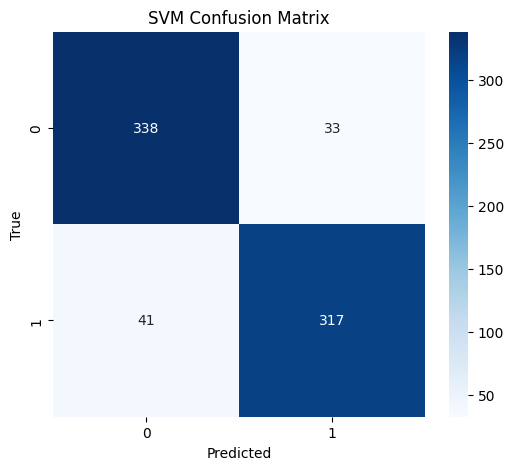

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#5. SVM with Grid Search
# -----------------------------
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]  # Only for 'poly' kernel
}

grid = GridSearchCV(SVC(probability=True, class_weight='balanced'),
                    param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

clf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# -----------------------------
# 6. Evaluate Model
# -----------------------------
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#y_val_pred = clf.predict(X_val_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# 7. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.show()


In [ ]:
# ==========================
# vggish + SVM + LIME (XAI)
# ==========================
!pip install lime
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train, # Use X_train_balanced as training data for LIME
    training_labels=y_train, # Use y_train_balanced
    feature_names=[f"feat_{i}" for i in range(X_train.shape[1])],
    class_names=['class_0', 'class_1'], # Assuming 0 and 1 are the class names
    mode='classification'
)

# Explain one prediction
i = 0  # index of test sample
exp = explainer.explain_instance(
    X_test[i], # Use X_test for test data, as the model was evaluated on it
    clf.predict_proba, # Use clf for the trained model
    num_features=15
)

# Print text explanation
print(exp.as_list())

# Visualize explanation
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.title("LIME Explanation for One VGGish Feature Vector")
plt.show()

In [56]:
from imblearn.over_sampling import SMOTE

# **result after smote**

In [57]:
#— SMOTE (training only)
    # =========================
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_bal.shape, y_train_bal.shape)


Before SMOTE: (2914, 128) (2914,)
After SMOTE: (2954, 128) (2954,)


In [80]:
# 6 — SVM + Grid Search
    # =========================
param_grid2 = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],

}


grid2 = GridSearchCV(SVC(probability=True,class_weight="balanced"), param_grid2, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
grid2.fit(X_train_bal, y_train_bal)

# Re-initialize clf with best parameters and ensure probability=True
best_params = grid2.best_params_
clf2 = SVC(probability=True, class_weight='balanced', **best_params)
clf2.fit(X_train_bal, y_train_bal) # Refit the best estimator

print("Best Params:", grid2.best_params_, "| Best CV Score:", grid2.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Params: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'} | Best CV Score: 0.8926860220378853


pipeline

Accuracy: 0.8984910836762688
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       371
           1       0.91      0.89      0.90       358

    accuracy                           0.90       729
   macro avg       0.90      0.90      0.90       729
weighted avg       0.90      0.90      0.90       729



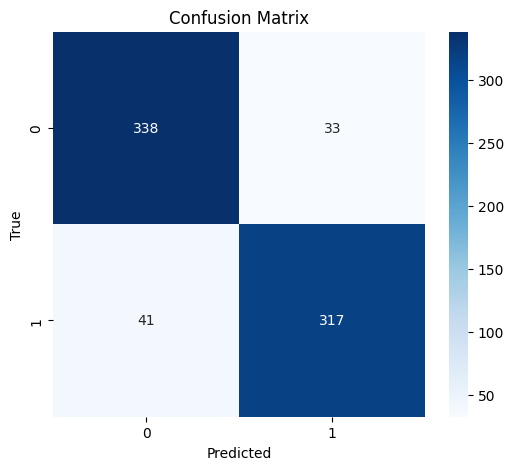

In [81]:

    # =========================
    # 7 — Evaluation
    # =========================
    y_pred = clf2.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    np.complex128 = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm2, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix"); plt.show()

    # =========================


In [60]:
!pip install lime


lime after smote

[('-0.05 < feat_124 <= 0.11', 0.003809252672576144), ('0.22 < feat_91 <= 0.34', 0.003740726551463235), ('feat_96 > 0.30', 0.0037113401910960605), ('0.19 < feat_60 <= 0.35', 0.003448321864626162), ('0.01 < feat_120 <= 0.25', 0.003329237649055647), ('0.19 < feat_77 <= 0.34', 0.0032915093010332784), ('0.21 < feat_67 <= 0.44', 0.0031861986842547005), ('feat_44 <= -0.06', 0.0031737313696289277), ('feat_17 > 0.39', 0.0031695571499584965), ('-0.63 < feat_3 <= -0.51', 0.0031326263813475567), ('0.34 < feat_2 <= 0.58', 0.003062291954117026), ('0.09 < feat_103 <= 0.17', 0.003003115163692711), ('-0.47 < feat_41 <= -0.39', 0.002752405631514432), ('-0.01 < feat_49 <= 0.08', 0.002745690568894791), ('feat_125 <= -0.35', 0.002450657824625245)]


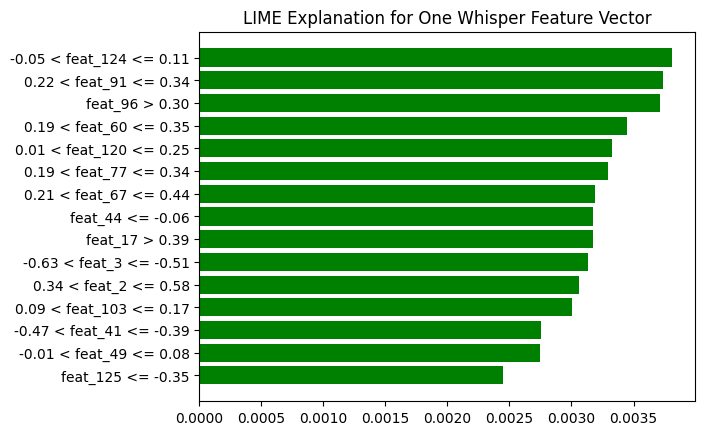

In [82]:
# ==========================
# vggish + SVM + LIME (XAI)
# ==========================
!pip install lime
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_bal, # Use X_train_balanced as training data for LIME
    training_labels=y_train_bal, # Use y_train_balanced
    feature_names=[f"feat_{i}" for i in range(X_train_bal.shape[1])],
    class_names=['class_0', 'class_1'], # Assuming 0 and 1 are the class names
    mode='classification'
)

# Explain one prediction
i = 0  # index of test sample
exp = explainer.explain_instance(
    X_test[i], # Use X_test for test data, as the model was evaluated on it
    clf.predict_proba, # Use clf for the trained model
    num_features=15
)

# Print text explanation
print(exp.as_list())

# Visualize explanation
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.title("LIME Explanation for One VGGish Feature Vector")
plt.show()